In [53]:
%load_ext autoreload
%autoreload 2
from ani_attenuation.synthetics import gen_synthetic_split
from ani_attenuation.measurement import window_traces, rotate_traces, attenuate_traces, dtstar_gridsearch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


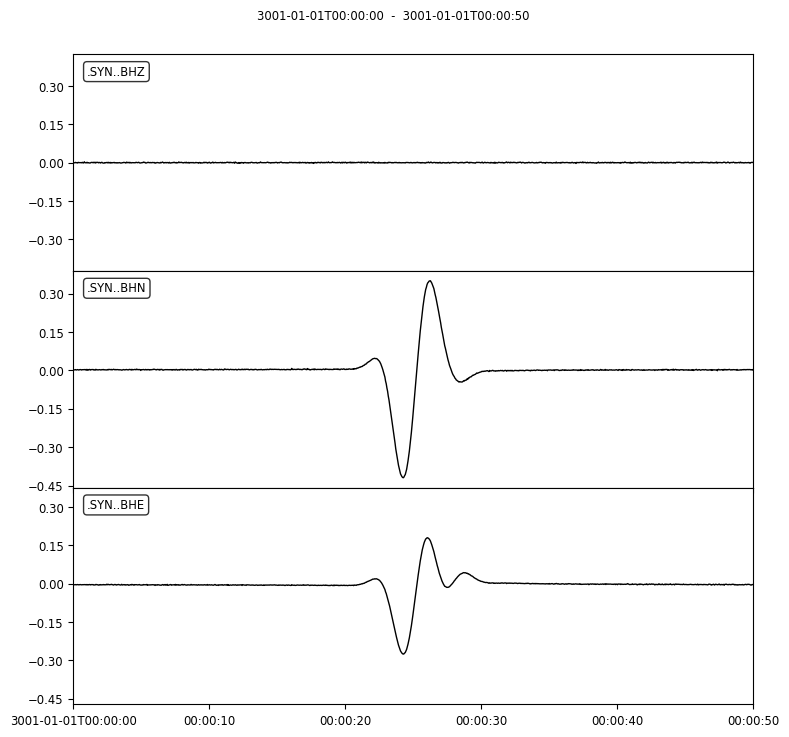

In [68]:
phi = 60
st = gen_synthetic_split(phi, 1.5, dtstar=0, noise=0.001, spol=30)
st.plot()
trF, trS = rotate_traces(st[0], st[1] ,phi)
st = window_traces(st)
difr= dtstar_gridsearch(st, 180, 100, dts_max=1)

In [39]:
import matplotlib.pyplot as plt
import numpy as np

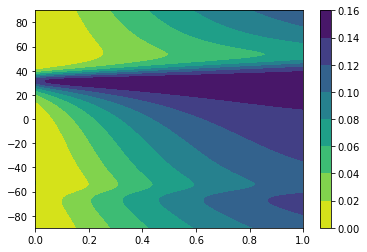

In [69]:
phi = np.linspace(-90,90,180)
dts = np.linspace(0,1,100)
F, TS = np.meshgrid(phi,dts)
C = plt.contourf(dts, phi, difr, cmap='viridis_r')
plt.colorbar(C)

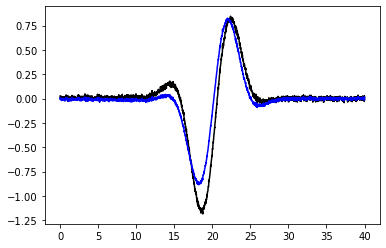

In [29]:
plot_fast_slow(st[0], st[1])

In [73]:
def plot_fast_slow(trF, trS):  
    time = trS.times()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(time, trF.data, 'k-')
    ax.plot(time, trS.data, 'b-')
    plt.show()

In [44]:
from ani_attenuation.synthetics import gabor_wavelet

In [51]:
x = np.linspace(-12.5,12.5,501)
y = gabor_wavelet(x, 0.2)

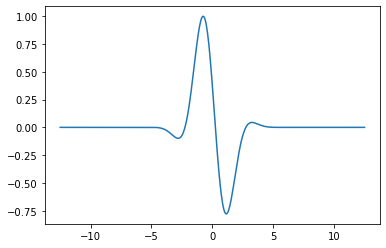

In [52]:
plt.plot(x, y)

In [55]:
import pandas as pd

In [57]:
ajee = pd.read_csv('/Users/ja17375/Projects/DeepMelt/Ethiopia/reproc_results/AJEE_sks_reprocessed.txt', delim_whitespace=True)

In [58]:
ajee.iloc[0]

STAT            AJEE
DATE         2016106
TIME          163257
STLA         7.25954
STLO         38.3026
EVLA         32.7906
EVLO        130.7543
EVDP            10.0
GCARC       88.17109
AZI         277.3931
BAZ         57.34802
SPOL        44.58271
WBEG        939.7276
WEND        953.7778
FAST           -24.0
DFAST            7.0
TLAG           1.625
DTLAG         0.2625
SI(Pa)      1.104812
SI(Pr)       1.07852
Q          -0.144773
EIGORIG     0.098526
EIGCORR     0.002267
SNR        20.155655
NDF               30
Name: 0, dtype: object

In [60]:
import obspy


In [75]:
st = obspy.read('/Users/ja17375/Projects/DeepMelt/Ethiopia/data/AJEE/run/AJEE_2016207_0906.BH?')
st = window_traces(st)
difr= dtstar_gridsearch(st, 180, 100, dts_max=4)

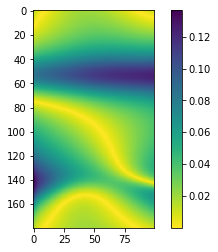

In [80]:
phi = np.linspace(-90,90,180)
dts = np.linspace(0,4,100)
F, TS = np.meshgrid(phi,dts)
C = plt.imshow(difr, cmap='viridis_r')
plt.colorbar(C)

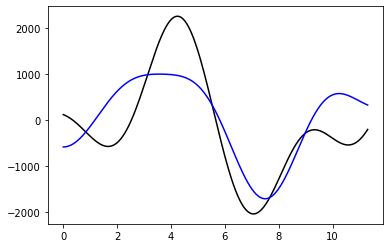

In [77]:
plot_fast_slow(st[0], st[1])